In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [50]:
#Read csv file
df = pd.read_csv('walmart_data.csv')

In [51]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [53]:
df.shape

(550068, 10)

In [54]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [55]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


<AxesSubplot:>

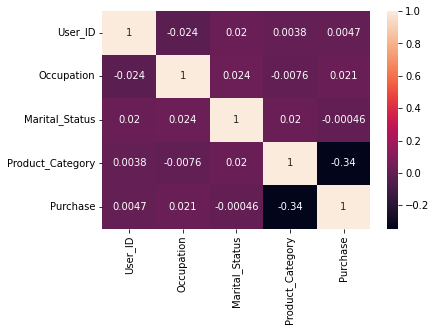

In [140]:
sns.heatmap(
    df.corr(),
    annot=True
)

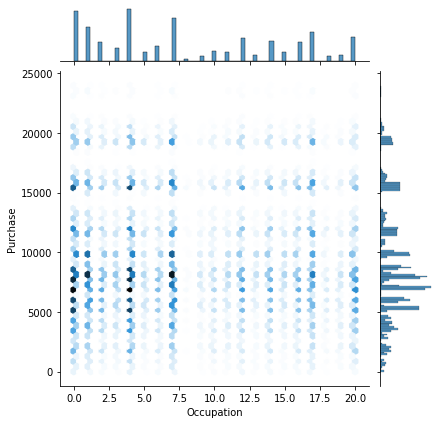

In [141]:
sns.jointplot(x='Occupation',y='Purchase',
              data=df, kind='hex'
             )

most of the purchase is done between 5000-10000.
Highest purchase is occupation 4, listed in the dataset, closely followed that by 0 and 7.

In [56]:
df['Age']=(df['Age'].str.strip('+'))

In [57]:
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+'))

In [58]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55,16,C,4,0,8,7969


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

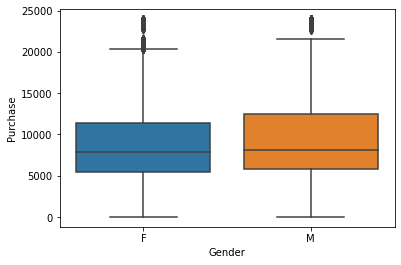

In [59]:
sns.boxplot(x="Gender", y="Purchase", data=df)

In [21]:
#Remove Outliers
purchase_m = df[df['Gender']=='M']['Purchase']
qm1 = np.quantile(purchase_m, 0.25)
qm3 = np.quantile(purchase_m, 0.75)
iqrm = qm3-qm1
upper_bound_m = qm3+(1.5*iqrm)
lower_bound_m = qm1-(1.5*iqrm)

purchase_f = df[df['Gender']=='F']['Purchase']
qf1 = np.quantile(df[df['Gender']=='F']['Purchase'], 0.25)
qf3 = np.quantile(df[df['Gender']=='F']['Purchase'], 0.75)
iqrf = qf3-qf1
upper_bound_f = qf3+(1.5*iqrf)
lower_bound_f = qf1-(1.5*iqrf)

In [70]:
#Recreate seperate data for male and female after removing outliers.
df_male = df[(df['Gender']=='M')&(df['Purchase']>=lower_bound_m)&(df['Purchase'] <= upper_bound_m)]

df_female = df[(df['Gender']=='F')&(df['Purchase']>=lower_bound_f)&(df['Purchase'] <= upper_bound_f)]

In [71]:
df_male

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55,16,C,4,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [72]:
df_female

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,137
550066,1006038,P00375436,F,55,1,C,2,0,20,365


In [73]:
df_male.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,4.124470e+05,412447.000000,412447.000000,412447.000000,412447.000000
mean,1.002995e+06,8.512883,0.406275,5.281018,9375.837603
std,1.706257e+03,6.553419,0.491138,4.003072,5017.363605
min,1.000002e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001504e+06,3.000000,0.000000,1.000000,5854.000000
50%,1.003041e+06,7.000000,0.000000,5.000000,8090.000000
75%,1.004409e+06,15.000000,1.000000,8.000000,12274.000000
max,1.006040e+06,20.000000,1.000000,20.000000,21569.000000


In [74]:
df_female.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.337440e+05,133744.000000,133744.000000,133744.000000,133744.000000
mean,1.003128e+06,6.740796,0.419129,5.647730,8538.524637
std,1.786092e+03,6.236844,0.493418,3.648607,4530.515860
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001569e+06,1.000000,0.000000,3.000000,5417.750000
50%,1.003159e+06,4.000000,0.000000,5.000000,7886.000000
75%,1.004762e+06,11.000000,1.000000,8.000000,10803.000000
max,1.006039e+06,20.000000,1.000000,20.000000,20350.000000


The average amount spend per transaction by male customers(i.e. 9375.83) is higher than female customers(i.e.8538.524637)

In [80]:
x_male = np.array(df_male['Purchase'])
x_male

x_female = np.array(df_female['Purchase'])
x_female

array([ 8370, 15200,  1422, ...,   137,   365,   490], dtype=int64)

d:\testautomation\python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\testautomation\python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

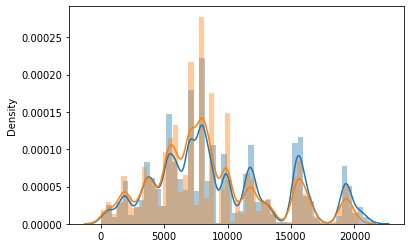

In [81]:
sns.distplot(x_male)
sns.distplot(x_female)

We can say that men purchases expensive products than women. 

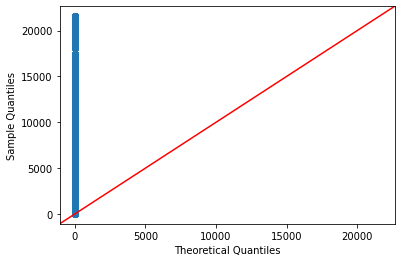

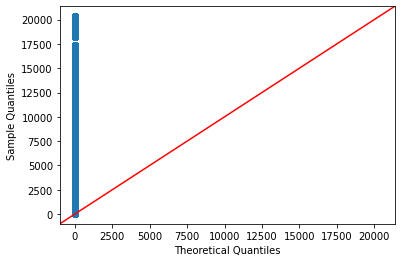

In [82]:
#QQPlot form male and female customers.
import statsmodels.api as sm
fig1 = sm.qqplot(x_male, line='45')
fig2 = sm.qqplot(x_female, line='45')

The distribution is not gaussian

In [83]:
# Let us compare CDFs also
mu_male = np.mean(x_male) 
s_male = np.std(x_male)
print(mu_male,s_male)

mu_female = np.mean(x_female) 
s_female = np.std(x_female)
print(mu_female,s_female)

9375.837603376918 5017.357522224402
8538.524636619213 4530.498922410687


In [84]:
# normally distributed data with mean=mu, std-dev=s
y_male = stats.norm.rvs(loc=mu_male, scale=s_male, size=1000)

y_female = stats.norm.rvs(loc=mu_female, scale=s_female, size=1000)

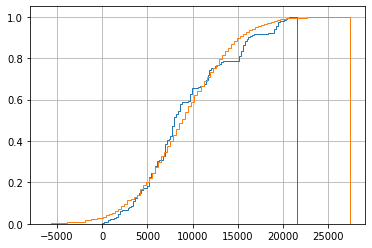

In [85]:
plt.grid()
a = plt.hist(x_male, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(y_male, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

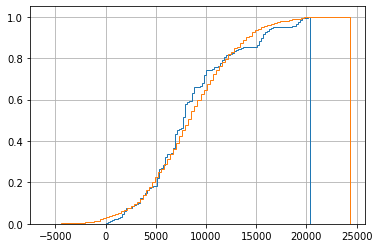

In [86]:
plt.grid()
a = plt.hist(x_female, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(y_female, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

The distributions are not same

<AxesSubplot:>

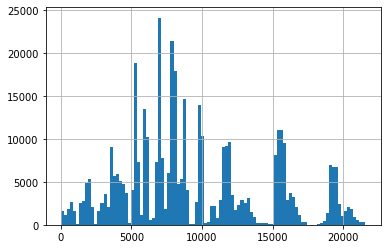

In [92]:
df_male["Purchase"].hist(bins = 100)

# CLT for Male cutomers.

In [98]:
r = 10000
data_male = df_male[(df["Occupation"] > 7) & (df["Occupation"] < 9)] ["Purchase"]
size = 100
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data_male, size=size)
    bs_means[i] = np.mean(bs_sample)

C:\Users\nikhil_rane\AppData\Local\Temp\ipykernel_52132\2606133734.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_male = df_male[(df["Occupation"] > 7) & (df["Occupation"] < 9)] ["Purchase"]


In [94]:
data_male.shape

(1182,)

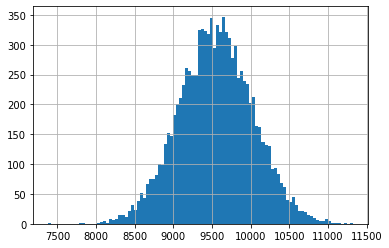

In [99]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(bs_means, bins=100)
plt.grid()
plt.show()

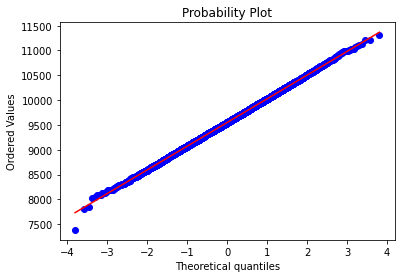

In [100]:
# QQ-plot with normal distribution
fig, ax1 = plt.subplots()
prob = stats.probplot(bs_means, dist=stats.norm, plot=ax1)

In [101]:
# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means))
print(np.std(bs_means))

9549.711858
476.97538710332617


In [102]:
print(np.mean(bs_means)-2*np.std(bs_means))
print(np.mean(bs_means)+2*np.std(bs_means))

8595.761083793348
10503.662632206653


In [103]:
# the 2.5th percentile and 97.5th percentile value 
print(np.percentile(bs_means,2.5))
print(np.percentile(bs_means,97.5))

8614.7675
10488.753999999999


In [116]:
# C.I on the 99th precentile?
#Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=1000
# bs_99p is a list of 'r' bootstrap sample's 99th percentiles
r = 10000
data_male = df_male[(df["Occupation"] > 7) & (df["Occupation"] < 9)] ["Purchase"]
size = 1000 
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data_male, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

C:\Users\nikhil_rane\AppData\Local\Temp\ipykernel_52132\4108630225.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_male = df_male[(df["Occupation"] > 7) & (df["Occupation"] < 9)] ["Purchase"]


In [117]:
bs_99p

array([19673.04, 20124.8 , 19680.9 , ..., 19677.  , 19622.17, 19639.34])

In [118]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))

19591.05
20303.0


In [119]:
# Point estimate of the 99th percenitle of the 75 observed samples
print(np.percentile(data_male,99))

19673.760000000002


# CLT for Female cutomers.

In [122]:
r = 10000
data_female = df_female[(df["Occupation"] > 6) & (df["Occupation"] < 9)] ["Purchase"]
size = 1000
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data_female, size=size)
    bs_means[i] = np.mean(bs_sample)

C:\Users\nikhil_rane\AppData\Local\Temp\ipykernel_52132\3376464286.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_female = df_female[(df["Occupation"] > 6) & (df["Occupation"] < 9)] ["Purchase"]


In [123]:
data_female.shape

(10224,)

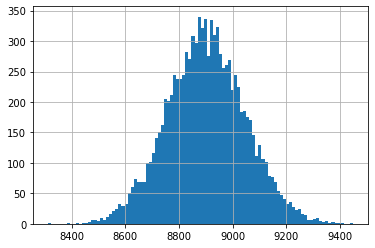

In [124]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(bs_means, bins=100)
plt.grid()
plt.show()

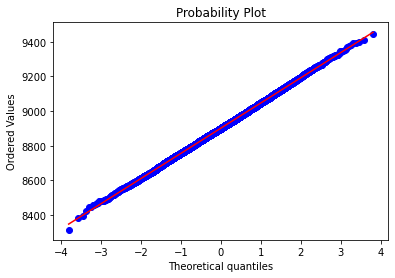

In [125]:
# QQ-plot with normal distribution
fig, ax1 = plt.subplots()
prob = stats.probplot(bs_means, dist=stats.norm, plot=ax1)

In [126]:
# compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
print(np.mean(bs_means))
print(np.std(bs_means))

8901.3383585
145.31050375672015


In [127]:
print(np.mean(bs_means)-2*np.std(bs_means))
print(np.mean(bs_means)+2*np.std(bs_means))

8610.717350986559
9191.95936601344


In [128]:
# could we just use the 2.5th percentile and 97.5th percentile value 
print(np.percentile(bs_means,2.5))
print(np.percentile(bs_means,97.5))

8616.4786
9188.716325


In [130]:
# What if we want a C.I on the 99th precentile?
#Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=1000
# bs_99p is a list of 'r' bootstrap sample's 99th percentiles
r = 10000
data_female = df_female[(df["Occupation"] > 7) & (df["Occupation"] < 9)] ["Purchase"]
size = 1000 
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data_female, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

C:\Users\nikhil_rane\AppData\Local\Temp\ipykernel_52132\2524097244.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_female = df_female[(df["Occupation"] > 7) & (df["Occupation"] < 9)] ["Purchase"]


In [131]:
bs_99p

array([19479.  , 19525.  , 19525.  , ..., 19340.  , 19341.39, 19525.  ])

In [132]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))

19295.0
19645.0


In [133]:
# Point estimate of the 99th percenitle of the 75 observed samples
print(np.percentile(data_female,99))

19498.78


# Observations -

1. Spendings of men is more than women as men urchases expensive products than womens.
2. C.I. for male customers is [8614.7675, 10488.753999999999] and for female customers is [8616.4786, 9188.716325].
3. As per the observed C.I. intervals for both customers, C.I. overlaps with each other, and walmart can take advantage of this point by increasing products which are useful for both type of customers.
4. For married and unmarried customers also, the results will be approximately similar.
5. On the basis of age, result will vary.